In [ ]:
#importing librarys
import pandas as pd #for loding data
import numpy as np #for maths ops


In [ ]:
# importing dataset
df=pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#nummarical/stastistical analysis of data set
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#dimensions of dataset
print("there are ",df.shape[0],"rows and",df.shape[1],"columns in the dataset")

there are  50 rows and 5 columns in the dataset


In [ ]:
#cheak for duplicats
print("there are",df.duplicated().sum(),"duplicates in the data set.")

there are 0 duplicates in the data set.


In [ ]:
#cheaking for NULL values in the data set
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# Correlation is used to analyze the strength and direction between two quantitative variables.
# find correlation b/w colms using corr()
cor=df.corr()
cor


<ipython-input-47-fffacbfb20b5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#EDA on dataset

In [ ]:
# Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data.

<Axes: >

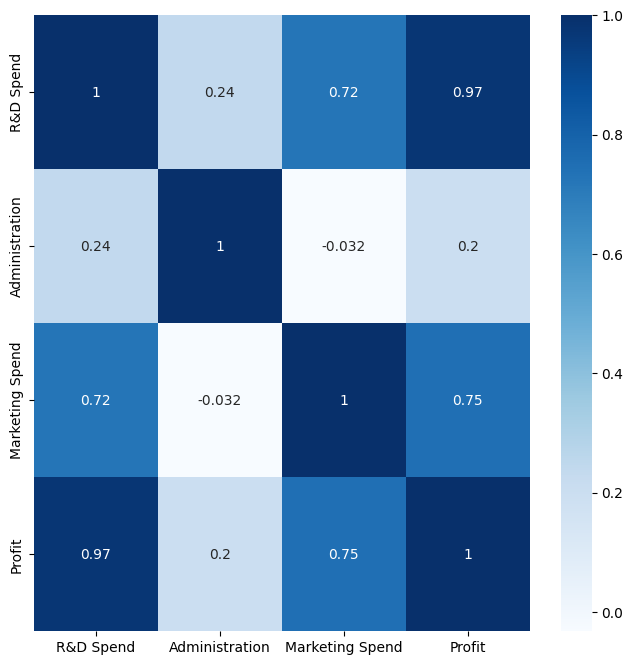

In [ ]:
# correlation matrix using seaborn
# ploting using matplotlib
!pip install seaborn
!pip install matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cor,annot=True,cmap="Blues")


Text(0.5, 0, 'continuous variable')

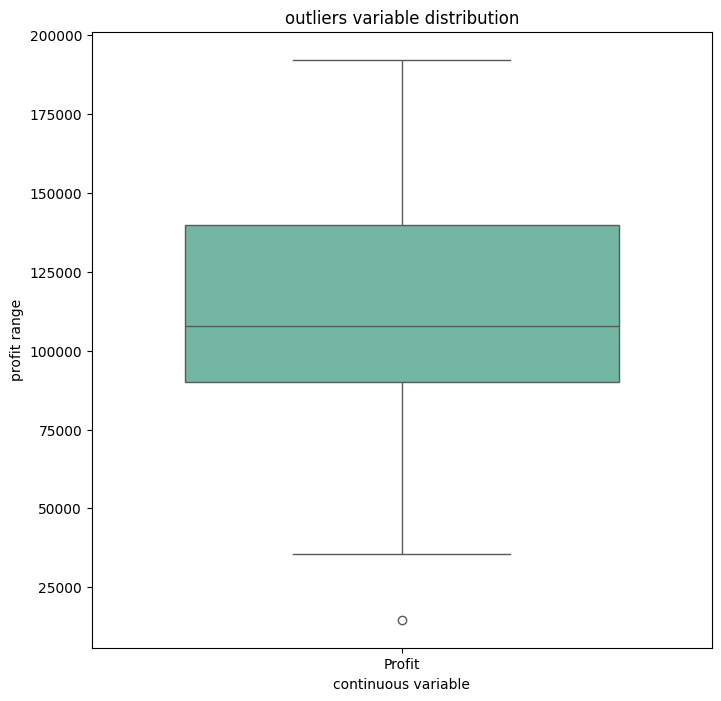

In [ ]:
#Outlayer detection in the target variable
outliers =["Profit"]
plt.rcParams["figure.figsize"]=[8,8] #runtime configuration parameters
sns.boxplot(data=df[outliers],orient="v",palette="Set2",width=0.7)   # orient = "v" : vertical boxplot ,
                                                                     # orient = "h" : hotrizontal boxplot
plt.title("outliers variable distribution") # to name the plt
plt.ylabel("profit range")  # to name the y-axis
plt.xlabel("continuous variable") # to name the x-axis
# plt.show()

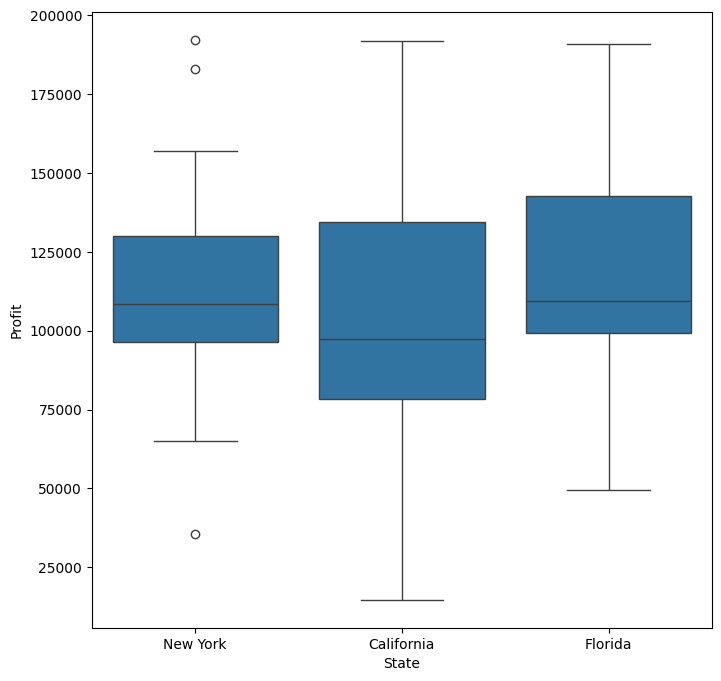

In [ ]:
# state-wise outliers detiction
sns.boxplot(x="State",y="Profit",data=df)
plt.show()

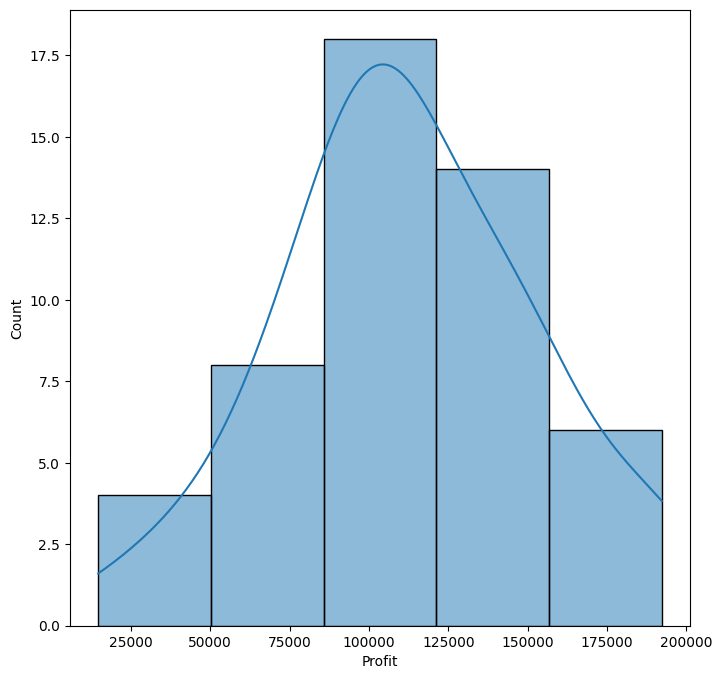

In [ ]:
#Histogram on profit
sns.histplot(df['Profit'],bins=5,kde=True)
plt.show()

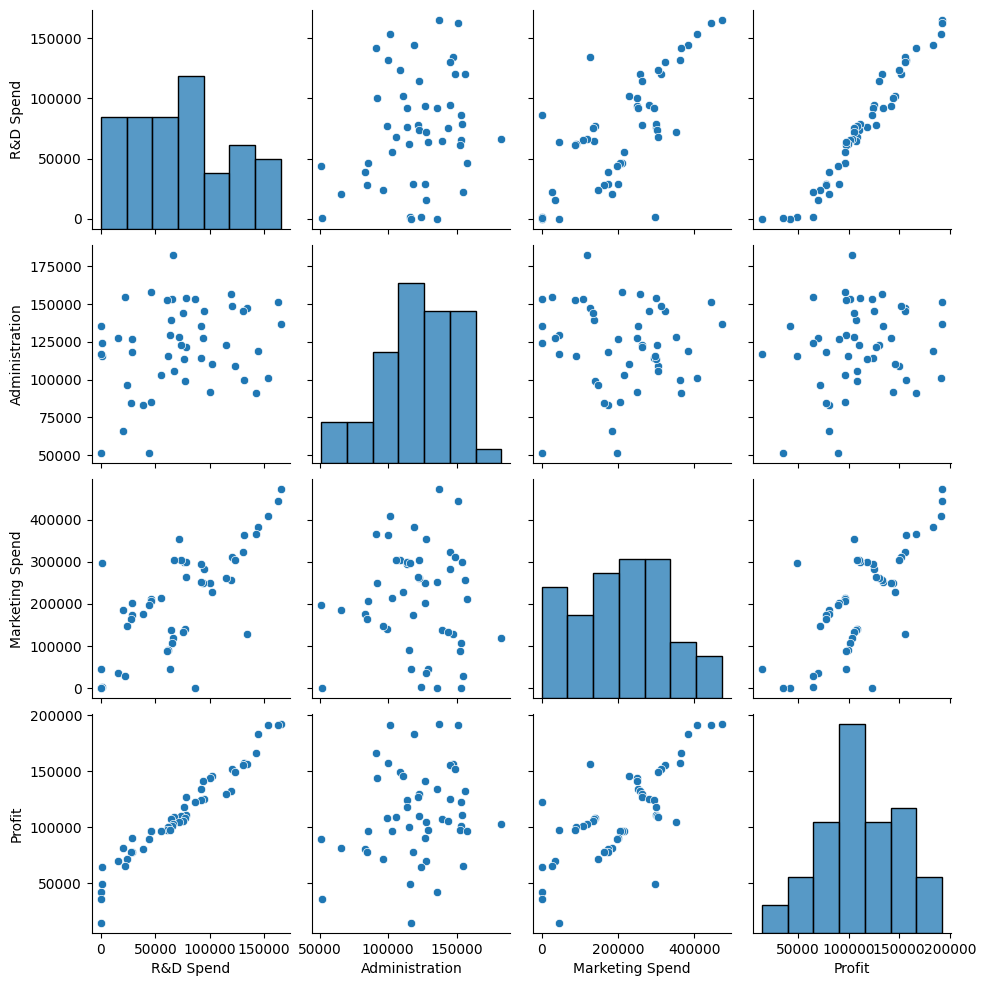

In [ ]:
#pair plot
sns.pairplot(df)
plt.show()

In [ ]:
# model devlopment
# spliting dataset in depenedent and independent variables
X= df.iloc[:,:-1].values
Y=df.iloc[:,4].values

#label encoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label Encoder: Encode labels with values between 0 and n_classes-1.

In [ ]:
lbncod=LabelEncoder()
X[:,3]= lbncod.fit_transform(X[:,3])
X1=pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349.2,136897.8,471784.1,2
1,162597.7,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [ ]:
# Spliting the data into testing and trining data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [ ]:
# '''Feature Scaling — Useful when Features have different units
# from sklearn.preprocessing import StandardScaler
# sc_x=StandardScaler()
# x_train=sc_x.fit_transform(x_train)
# x_test=sc_x.fit_transform(x_test)
# sc_y=StandardScaler()
# y_train=sc_y.fit_transform(y_train)
# y_test=sc_y.fit_transform(y_test)'''


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [ ]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

Testing scores

In [ ]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
testing_score =int(testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)
trining_score=int(training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149947
Model Score/Performance on Training data 0.9515496105627431


In [ ]:
# Comparing the predicted values and actual values
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


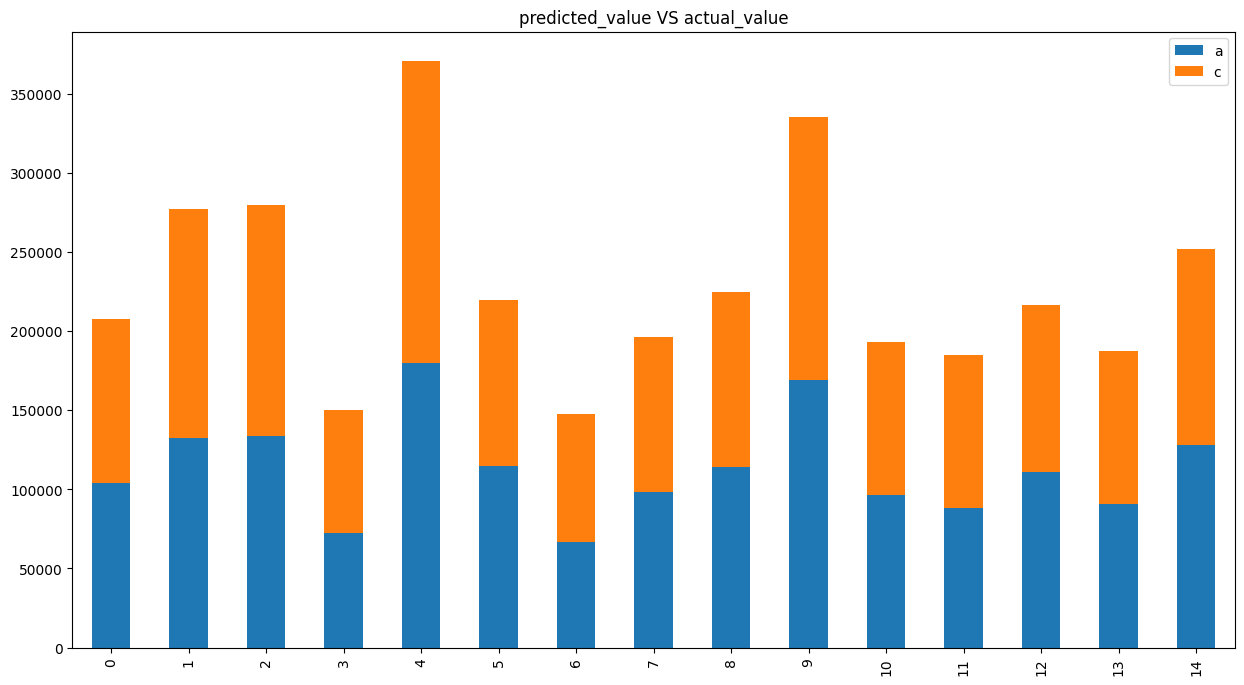

In [ ]:
plotdata=pd.DataFrame({'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
plotdata.plot(kind='bar',stacked=True,figsize=(15,8))
plt.title("predicted_value VS actual_value")
plt.legend("predicted value,actuval")
plt.legend("actuval value")


Model evaluation

In [ ]:
# R2 score: R2 score – R squared score.
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)


R2 score of model is : 93.39448007716635


In [ ]:
# 2. MSE: MSE – Mean Squared Error.
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.946446


In [ ]:
# 3. RMSE: RMSE – Root Mean Squared Error.
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974607


In [ ]:
# 4. MAE: MAE – Mean Absolute Error.
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580028
